In [1]:
import requests
import pandas as pd
import numpy as np
import os
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
df = pd.read_csv('netflix_titles.csv')
def get_genre(row):
    if row['type'] == 'Movie':
        return row['listed_in'].split(',')[0]
    else:
        return row['listed_in'].split(',')[1] 
df.head() 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Connection to the SQLite database

In [3]:
conn = sqlite3.connect('netflix_project.db')

## Exporting the DataFrame to a table in the SQLite database

In [4]:
df.to_sql('netflix', conn, if_exists='replace', index=False)

8807

## Function to run SQL query and return DataFrame


In [5]:
def run_query(query):
    cursor = conn.cursor()
    cursor.execute(query)
    
    columns = [col[0] for col in cursor.description]
    
    data = cursor.fetchall()
    df = pd.DataFrame(data, columns=columns)
    cursor.close()

    return df
print(df)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

## Count of Movies vs TV Show

In [6]:
query = """
SELECT type, COUNT(*) AS count
FROM netflix
GROUP BY type
"""

df = run_query(query)
print(df)

      type  count
0    Movie   6131
1  TV Show   2676


C:\Users\Capaciti\AppData\Local\Temp\ipykernel_5908\2047789407.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='type', y='count', palette='pastel')


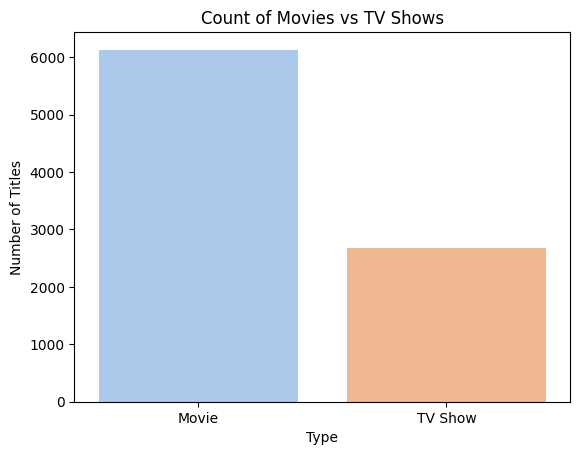

In [7]:
sns.barplot(data=df, x='type', y='count', palette='pastel')
plt.title('Count of Movies vs TV Shows')
plt.ylabel('Number of Titles')
plt.xlabel('Type')
plt.show()

## Distribution of Ratings

In [8]:
query = """
SELECT rating, COUNT(*) AS count
FROM netflix
GROUP BY rating
ORDER BY count DESC
"""

df = run_query(query)
print(df)



      rating  count
0      TV-MA   3207
1      TV-14   2160
2      TV-PG    863
3          R    799
4      PG-13    490
5      TV-Y7    334
6       TV-Y    307
7         PG    287
8       TV-G    220
9         NR     80
10         G     41
11  TV-Y7-FV      6
12      None      4
13        UR      3
14     NC-17      3
15    84 min      1
16    74 min      1
17    66 min      1


C:\Users\Capaciti\AppData\Local\Temp\ipykernel_5908\3916635635.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='count', y='rating', palette='muted')


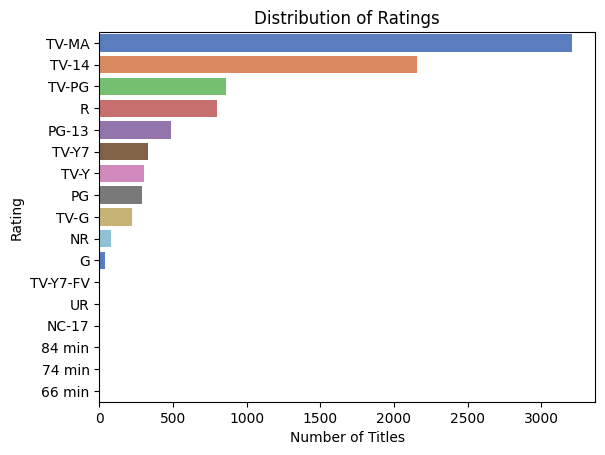

In [9]:
sns.barplot(data=df, x='count', y='rating', palette='muted')
plt.title('Distribution of Ratings')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.show()

## Shows with the longest description

In [10]:
query = """
SELECT title, LENGTH(description) AS desc_length
FROM netflix
ORDER BY desc_length DESC
LIMIT 5
"""

df = run_query(query)
print(df)

                          title  desc_length
0               Namastey London          248
1                         Billu          248
2  Opium and the Kung Fu Master          246
3                    Teen Patti          246
4           Balto 2: Wolf Quest          245


C:\Users\Capaciti\AppData\Local\Temp\ipykernel_5908\2655537598.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='desc_length', y='title', palette='deep')


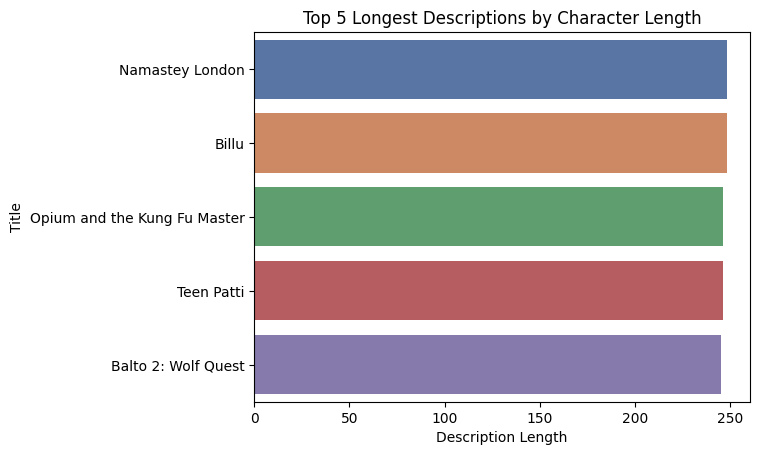

In [11]:
sns.barplot(data=df, x='desc_length', y='title', palette='deep')
plt.title('Top 5 Longest Descriptions by Character Length')
plt.xlabel('Description Length')
plt.ylabel('Title')
plt.show()

## Top 5 Countries by Content

In [12]:
query = """
SELECT country, COUNT(*) AS count FROM netflix
WHERE country IS NOT NULL
GROUP BY country ORDER BY count DESC LIMIT 5;
"""
df = run_query(query)
print(df)

          country  count
0   United States   2818
1           India    972
2  United Kingdom    419
3           Japan    245
4     South Korea    199


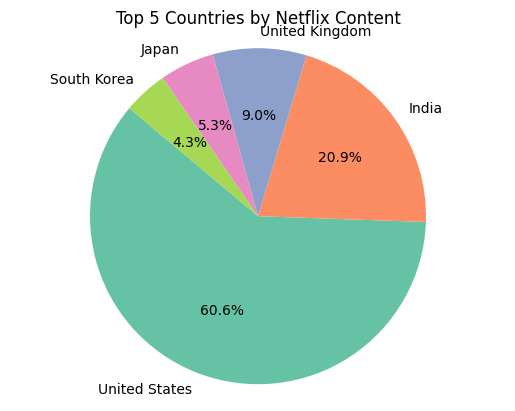

In [13]:
plt.pie(data=df, x= 'count', labels= 'country', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title("Top 5 Countries by Netflix Content")
plt.axis('equal')
plt.show()

## Number of Releases Per Year

In [14]:
query = "SELECT release_year, COUNT(*) AS count FROM netflix WHERE release_year IS NOT NULL GROUP BY release_year;"
df = run_query(query)
print(df)

    release_year  count
0           1925      1
1           1942      2
2           1943      3
3           1944      3
4           1945      4
..           ...    ...
69          2017   1032
70          2018   1147
71          2019   1030
72          2020    953
73          2021    592

[74 rows x 2 columns]


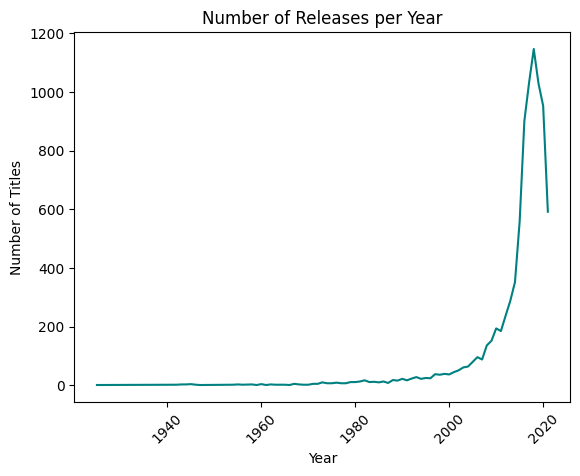

In [15]:
sns.lineplot(data=df, x='release_year', y= 'count', markers='o', color = 'teal')
plt.title("Number of Releases per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

##  Count by Rating

In [16]:
query = "SELECT rating, COUNT(*) AS count FROM netflix GROUP BY rating;"
df = run_query(query).sort_values(by='count', ascending=False)
print(df)

      rating  count
12     TV-MA   3207
10     TV-14   2160
13     TV-PG    863
9          R    799
8      PG-13    490
15     TV-Y7    334
14      TV-Y    307
7         PG    287
11      TV-G    220
6         NR     80
4          G     41
16  TV-Y7-FV      6
0       None      4
5      NC-17      3
17        UR      3
1     66 min      1
3     84 min      1
2     74 min      1


C:\Users\Capaciti\AppData\Local\Temp\ipykernel_5908\3969024481.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x= 'count', y='rating', palette='muted')


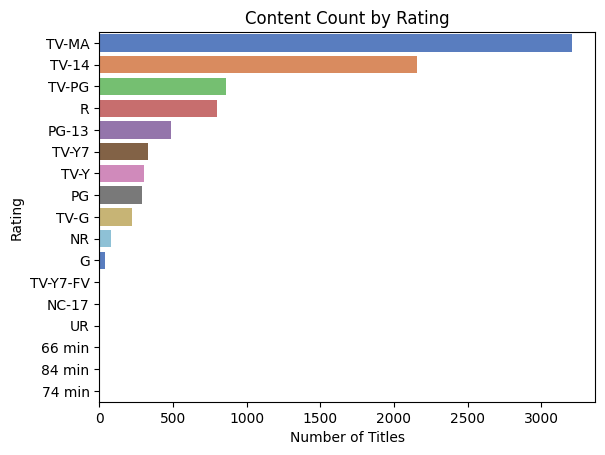

In [17]:
sns.barplot(data=df, x= 'count', y='rating', palette='muted')
plt.title("Content Count by Rating")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.show()

## Year When Titles Were Added 

In [18]:
query = """
SELECT date_added
FROM netflix
WHERE date_added IS NOT NULL;
"""
df = run_query(query)
print(df)

              date_added
0     September 25, 2021
1     September 24, 2021
2     September 24, 2021
3     September 24, 2021
4     September 24, 2021
...                  ...
8792   November 20, 2019
8793        July 1, 2019
8794    November 1, 2019
8795    January 11, 2020
8796       March 2, 2019

[8797 rows x 1 columns]


### Converting textual dates to datetime

In [19]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df['year_added'] = df['date_added'].dt.year

C:\Users\Capaciti\AppData\Local\Temp\ipykernel_5908\538236843.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly, x='year_added', y='count', palette='coolwarm')


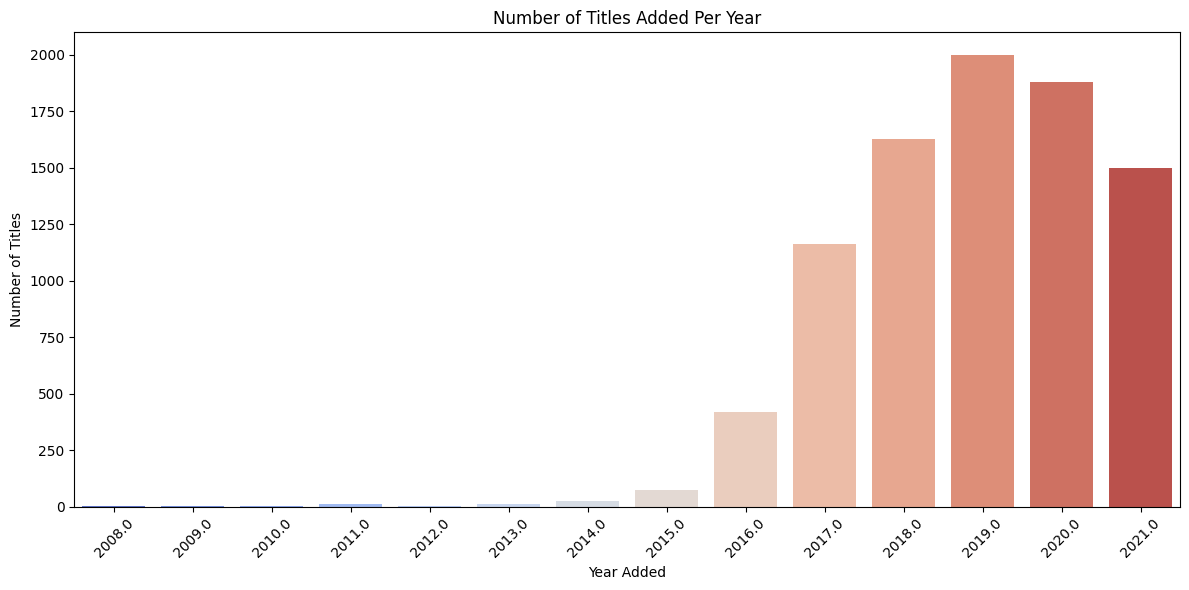

In [20]:
yearly = df.groupby('year_added').size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly, x='year_added', y='count', palette='coolwarm')
plt.title("Number of Titles Added Per Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Titles Added Between 2019–2021

In [21]:
query = """
SELECT date_added
FROM netflix
WHERE date_added IS NOT NULL;
"""
df = run_query(query)
print(df)

              date_added
0     September 25, 2021
1     September 24, 2021
2     September 24, 2021
3     September 24, 2021
4     September 24, 2021
...                  ...
8792   November 20, 2019
8793        July 1, 2019
8794    November 1, 2019
8795    January 11, 2020
8796       March 2, 2019

[8797 rows x 1 columns]


### Converting date_added to datetime and extract year

In [22]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df['year_added'] = df['date_added'].dt.year

### Filter years between 2019 and 2021

In [23]:
df_filtered = df[df['year_added'].between(2019, 2021)]

### Group and count

In [24]:
yearly = df_filtered.groupby('year_added').size().reset_index(name='count')


C:\Users\Capaciti\AppData\Local\Temp\ipykernel_5908\926075097.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly, x='year_added', y='count', palette='mako')


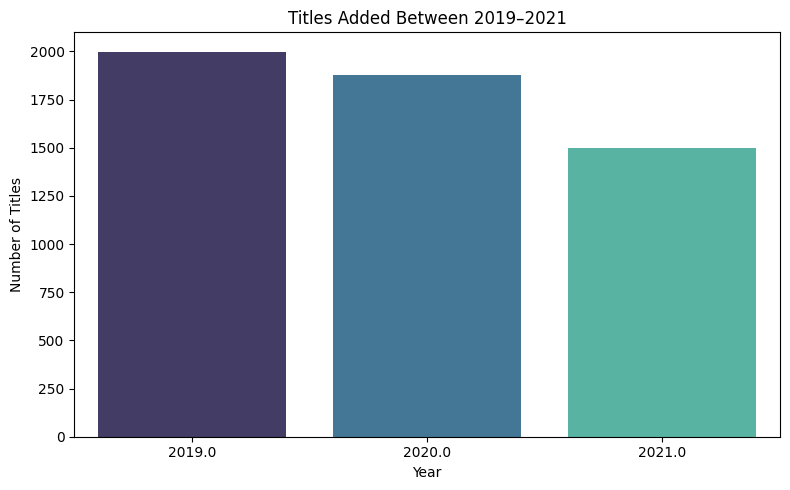

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(data=yearly, x='year_added', y='count', palette='mako')
plt.title("Titles Added Between 2019–2021")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

###  Top 5 Genres

In [26]:
query = """
SELECT listed_in, COUNT(*) AS count 
FROM netflix
GROUP BY listed_in 
ORDER BY count DESC LIMIT 5;
"""
df = run_query(query)
print(df)

                                          listed_in  count
0                      Dramas, International Movies    362
1                                     Documentaries    359
2                                   Stand-Up Comedy    334
3            Comedies, Dramas, International Movies    274
4  Dramas, Independent Movies, International Movies    252


C:\Users\Capaciti\AppData\Local\Temp\ipykernel_5908\376011803.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='listed_in', x='count', palette='light:#5A9')


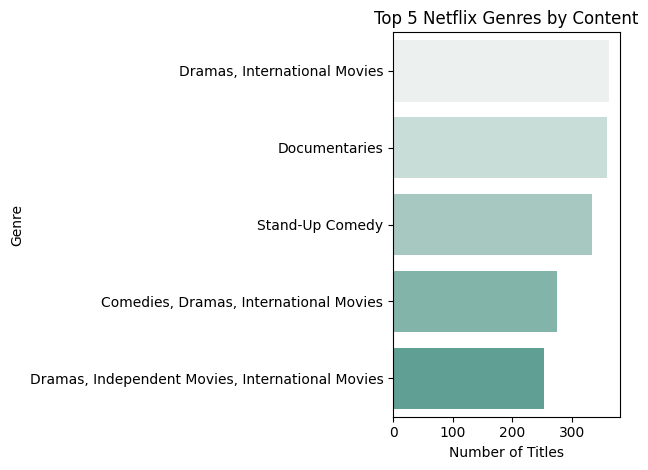

In [27]:
sns.barplot(data=df, y='listed_in', x='count', palette='light:#5A9')
plt.title("Top 5 Netflix Genres by Content")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

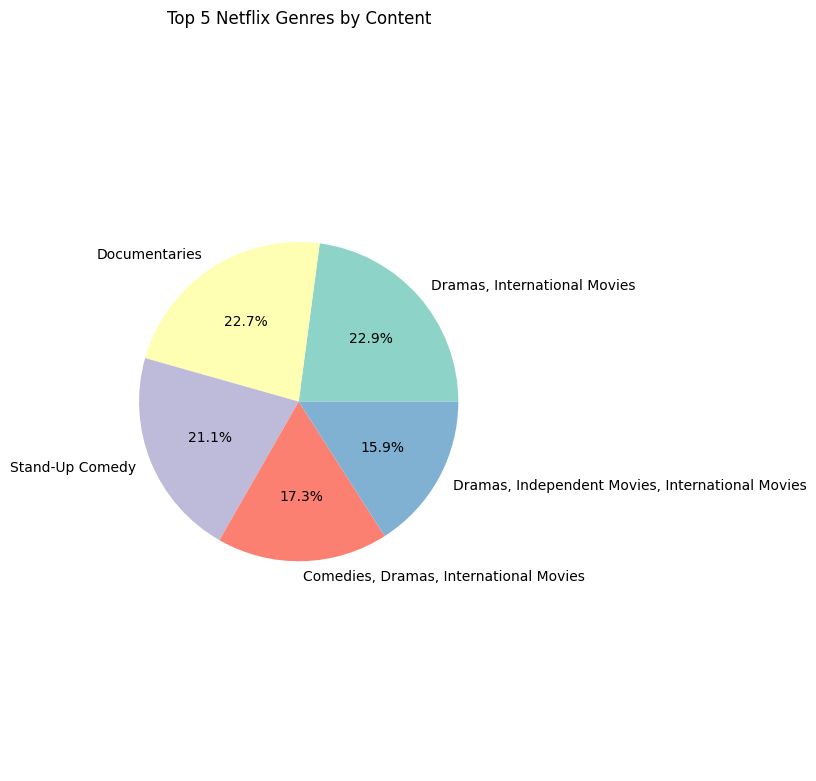

In [28]:
plt.figure(figsize=(8, 8))
plt.pie(data=df, x='count', labels='listed_in', autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title("Top 5 Netflix Genres by Content")
plt.axis('equal')  # Keeps pie chart circular
plt.tight_layout()
plt.show()

###  Top 5 Longest Movies by Duration

In [29]:
query = """
SELECT 
    title, 
    CAST(substr(duration, 1, instr(duration, ' ') - 1) AS INTEGER) AS minutes
FROM 
    netflix
WHERE 
    type = 'Movie' AND duration LIKE '%min%'
ORDER BY 
    minutes DESC
LIMIT 5;
"""

df = run_query(query)
print(df)

                         title  minutes
0   Black Mirror: Bandersnatch      312
1  Headspace: Unwind Your Mind      273
2       The School of Mischief      253
3               No Longer kids      237
4           Lock Your Girls In      233


C:\Users\Capaciti\AppData\Local\Temp\ipykernel_5908\3710258313.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x= 'minutes', y= 'title',  palette='flare')


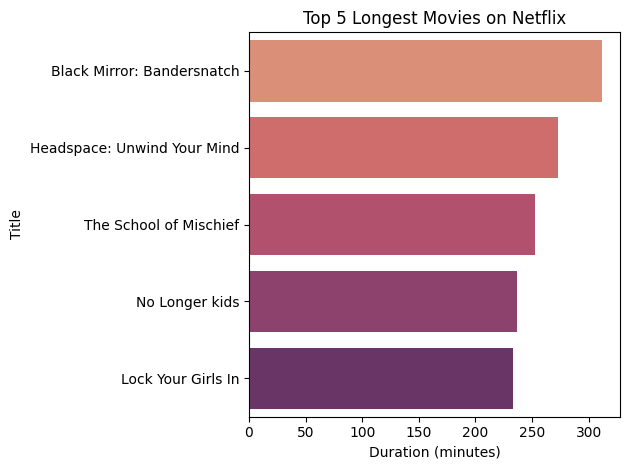

In [30]:
sns.barplot(data=df, x= 'minutes', y= 'title',  palette='flare')
plt.title("Top 5 Longest Movies on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Title")
plt.tight_layout()
plt.show()

### Top 10 Directors by Number of Contents

In [31]:
query = """
SELECT director, COUNT(*) AS count 
FROM netflix 
WHERE director IS NOT NULL 
GROUP BY director 
ORDER BY count DESC 
LIMIT 10;
"""
df = run_query(query)
print(df)


                 director  count
0           Rajiv Chilaka     19
1  Raúl Campos, Jan Suter     18
2             Suhas Kadav     16
3            Marcus Raboy     16
4               Jay Karas     14
5     Cathy Garcia-Molina     13
6         Youssef Chahine     12
7         Martin Scorsese     12
8             Jay Chapman     12
9        Steven Spielberg     11


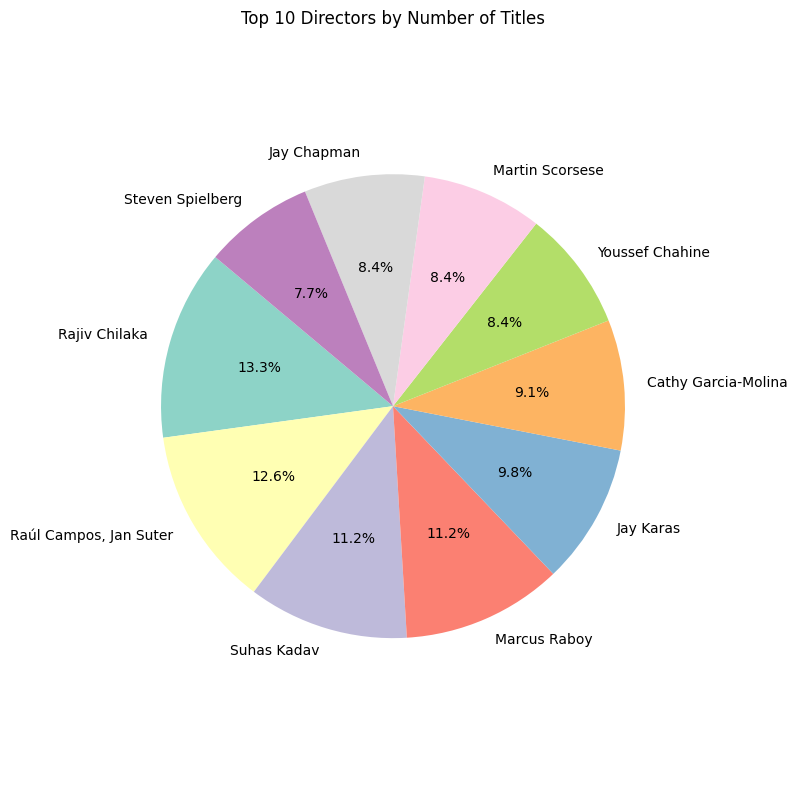

In [32]:
plt.figure(figsize=(8,8))
plt.pie(data=df, x='count', labels= 'director', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title("Top 10 Directors by Number of Titles")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

### Monthly Content Additions

#### Raw date added data

In [33]:
query = """
SELECT date_added
FROM netflix
WHERE date_added IS NOT NULL;
"""
df = run_query(query)
print(df)

              date_added
0     September 25, 2021
1     September 24, 2021
2     September 24, 2021
3     September 24, 2021
4     September 24, 2021
...                  ...
8792   November 20, 2019
8793        July 1, 2019
8794    November 1, 2019
8795    January 11, 2020
8796       March 2, 2019

[8797 rows x 1 columns]


#### Convert date_added to datetime and format as YYYY-MM

In [34]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df = df.dropna(subset=['date_added'])  # drop rows where parsing failed
df['month_added'] = df['date_added'].dt.to_period('M').astype(str)

#### Group By Month

In [35]:
monthly = df.groupby('month_added').size().reset_index(name='total')

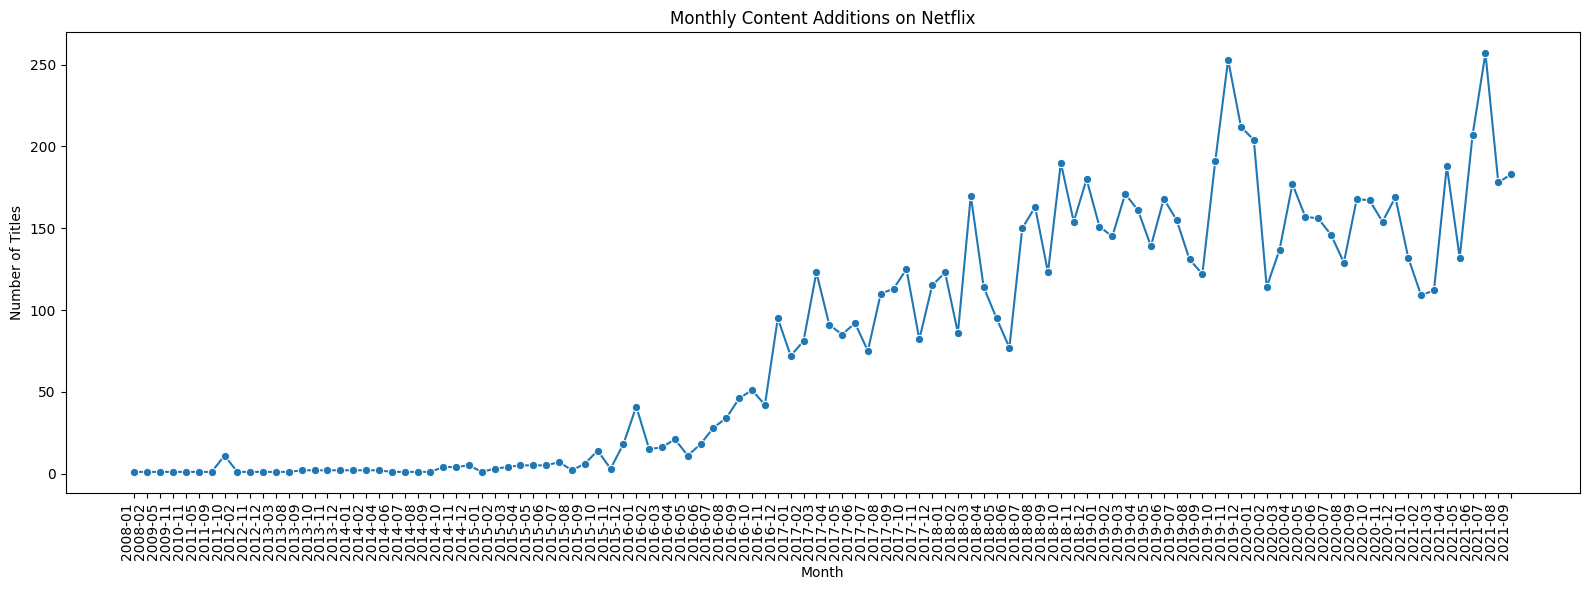

In [36]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=monthly, x='month_added', y='total', marker='o')
plt.xticks(rotation=90, ha='right')
plt.title("Monthly Content Additions on Netflix")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

### Categorize Content by Rating Level

In [37]:
query = """
SELECT 
  CASE
    WHEN rating IN ('G', 'PG', 'TV-G', 'TV-Y', 'TV-Y7', 'TV-Y7-FV') THEN 'Family'
    WHEN rating IN ('PG-13', 'TV-14', 'TV-PG') THEN 'Teen'
    WHEN rating IN ('R', 'TV-MA', 'NC-17') THEN 'Adult'
    ELSE 'Other'
  END AS category,
  COUNT(*) AS count
FROM netflix
WHERE rating NOT LIKE '%min%' AND rating IS NOT NULL
GROUP BY category;
"""
df = run_query(query)
print(df)

  category  count
0    Adult   4009
1   Family   1195
2    Other     83
3     Teen   3513


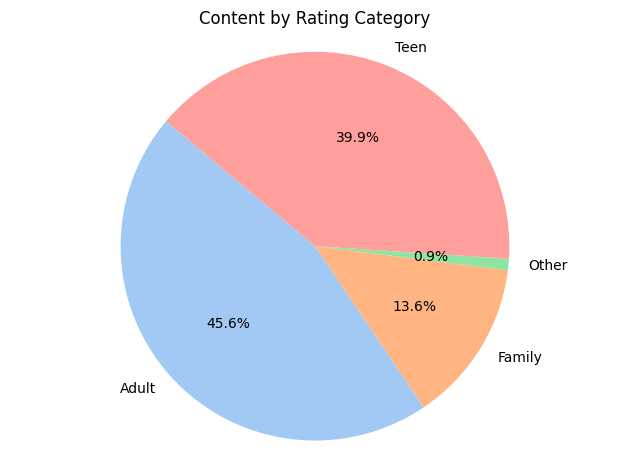

In [38]:
plt.pie(data=df, x= 'count', labels= 'category', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Content by Rating Category")
plt.axis('equal')
plt.tight_layout()
plt.show()

### Top 5 Directors

In [39]:
query = """
SELECT director, COUNT(*) AS count 
FROM netflix 
WHERE director IS NOT NULL 
GROUP BY director 
ORDER BY count DESC 
LIMIT 5;
"""
df = run_query(query)
print(df)

                 director  count
0           Rajiv Chilaka     19
1  Raúl Campos, Jan Suter     18
2             Suhas Kadav     16
3            Marcus Raboy     16
4               Jay Karas     14


C:\Users\Capaciti\AppData\Local\Temp\ipykernel_5908\2223657817.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='count', y='director', palette='Blues_d')


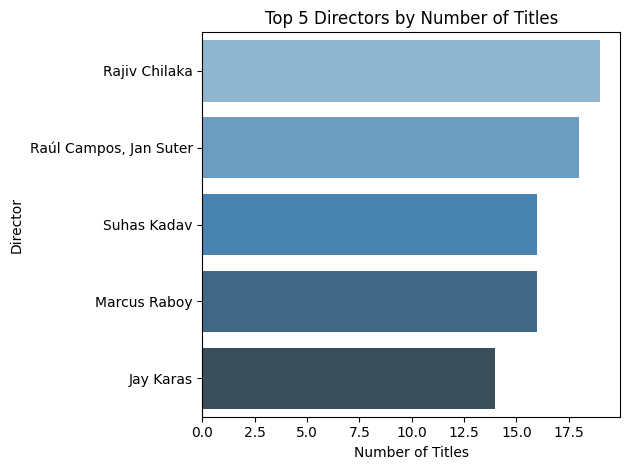

In [40]:
sns.barplot(data=df, x='count', y='director', palette='Blues_d')
plt.title("Top 5 Directors by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.tight_layout()
plt.show()

### Top 3 Recent Titles

#### Raw query

In [41]:
query = """
SELECT title, type, date_added
FROM netflix
WHERE date_added IS NOT NULL;
"""
df = run_query(query)
print(df)

                      title     type          date_added
0      Dick Johnson Is Dead    Movie  September 25, 2021
1             Blood & Water  TV Show  September 24, 2021
2                 Ganglands  TV Show  September 24, 2021
3     Jailbirds New Orleans  TV Show  September 24, 2021
4              Kota Factory  TV Show  September 24, 2021
...                     ...      ...                 ...
8792                 Zodiac    Movie   November 20, 2019
8793            Zombie Dumb  TV Show        July 1, 2019
8794             Zombieland    Movie    November 1, 2019
8795                   Zoom    Movie    January 11, 2020
8796                 Zubaan    Movie       March 2, 2019

[8797 rows x 3 columns]


#### Convert date_added to datetime

In [42]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df = df.dropna(subset=['date_added'])

####  Rank within each type

In [43]:
df['rnk'] = df.groupby('type')['date_added'].rank(method='first', ascending=False)

#### Filter top 3 recent per type

In [44]:
top3_df = df[df['rnk'] <= 3]

C:\Users\Capaciti\AppData\Local\Temp\ipykernel_5908\3228878532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top3_df, x='type', palette='Set1')


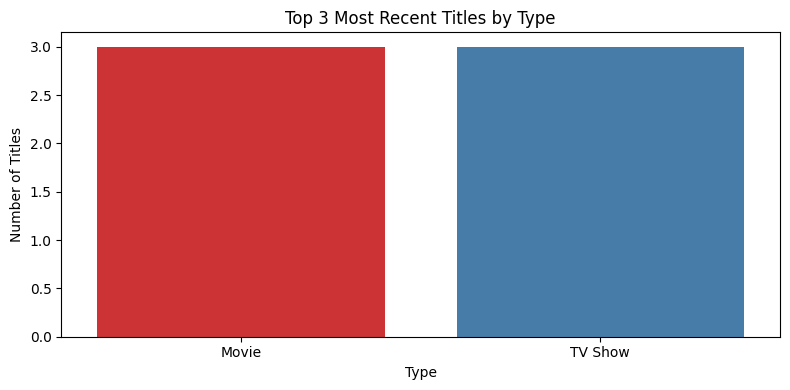

In [45]:
plt.figure(figsize=(8, 4))
sns.countplot(data=top3_df, x='type', palette='Set1')
plt.title('Top 3 Most Recent Titles by Type')
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

### Genre Titles by Genre

In [46]:
query = """
SELECT * 
FROM netflix 
WHERE listed_in NOT LIKE '%,%';
"""
df = run_query(query)
print(df)

     show_id     type                                         title  \
0         s1    Movie                          Dick Johnson Is Dead   
1         s7    Movie              My Little Pony: A New Generation   
2        s19    Movie                                     Intrusion   
3        s24    Movie  Go! Go! Cory Carson: Chrissy Takes the Wheel   
4        s28    Movie                                     Grown Ups   
...      ...      ...                                           ...   
2015   s8784  TV Show                                          Yoko   
2016   s8785    Movie                          Yoko and His Friends   
2017   s8786  TV Show                                           YOM   
2018   s8787    Movie                                  You Can Tutu   
2019   s8798  TV Show                                     Zak Storm   

                           director  \
0                   Kirsten Johnson   
1     Robert Cullen, José Luis Ucha   
2                        Adam 

#### Counting Single Genres

In [47]:
genre_counts = df['listed_in'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

C:\Users\Capaciti\AppData\Local\Temp\ipykernel_5908\3597846533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts.head(10), x='count', y='genre', palette='cubehelix')


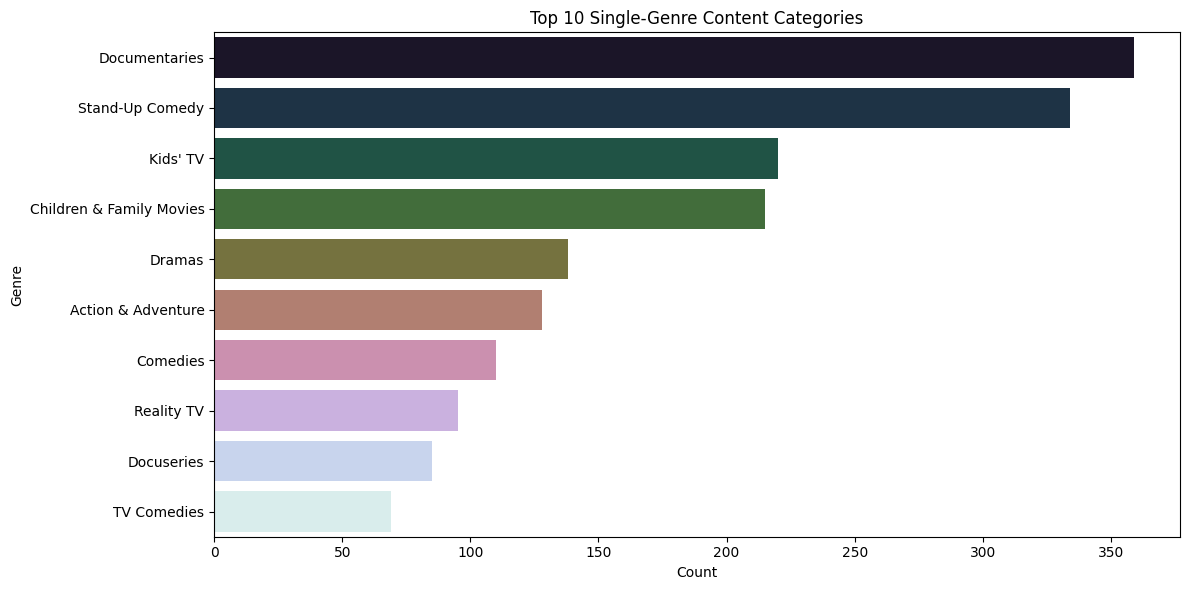

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_counts.head(10), x='count', y='genre', palette='cubehelix')
plt.title('Top 10 Single-Genre Content Categories')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()